In [1]:
import proplot as plot
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [107]:
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE

rng = np.random.RandomState()
gal_rng = np.random.RandomState()

data = generate_sim(
    rng=rng,
    gal_rng=gal_rng,
    coadd_config={
        "central_size": 225,
        "buffer_size": 25,
        "scale": PIXEL_SCALE,
    },
    se_config={
        "n_images": 2,
        "wcs_config": {
            "position_angle_range": (0, 0), 
            "dither_scale": PIXEL_SCALE,
            "scale": PIXEL_SCALE, 
            "scale_frac_std": 0,
            "shear_std": 0,
        },
    },
    psf_config={
        "type": "galsim.Gaussian",
        "fwhm": 0.8,
        "fwhm_frac_std": 0.1,
        "shear_std": 0,
        "shear": 0,
    },
    layout_config={
        "type": "grid",
        "ngal_per_side": 7,
        "ngal_per_arcmin2": 60,        
        "dither_scale": 0,
    },
    gal_config={
        "type": "exp-bright",
        "noise": 10,
    },
    msk_config={
        "cosmic_rays": False,
        "bad_columns": False,
    },
    shear_config={
        "scene": False,
        "g1": 0.0,
        "g2": 0.0,
    },
)

<IPython.core.display.Javascript object>


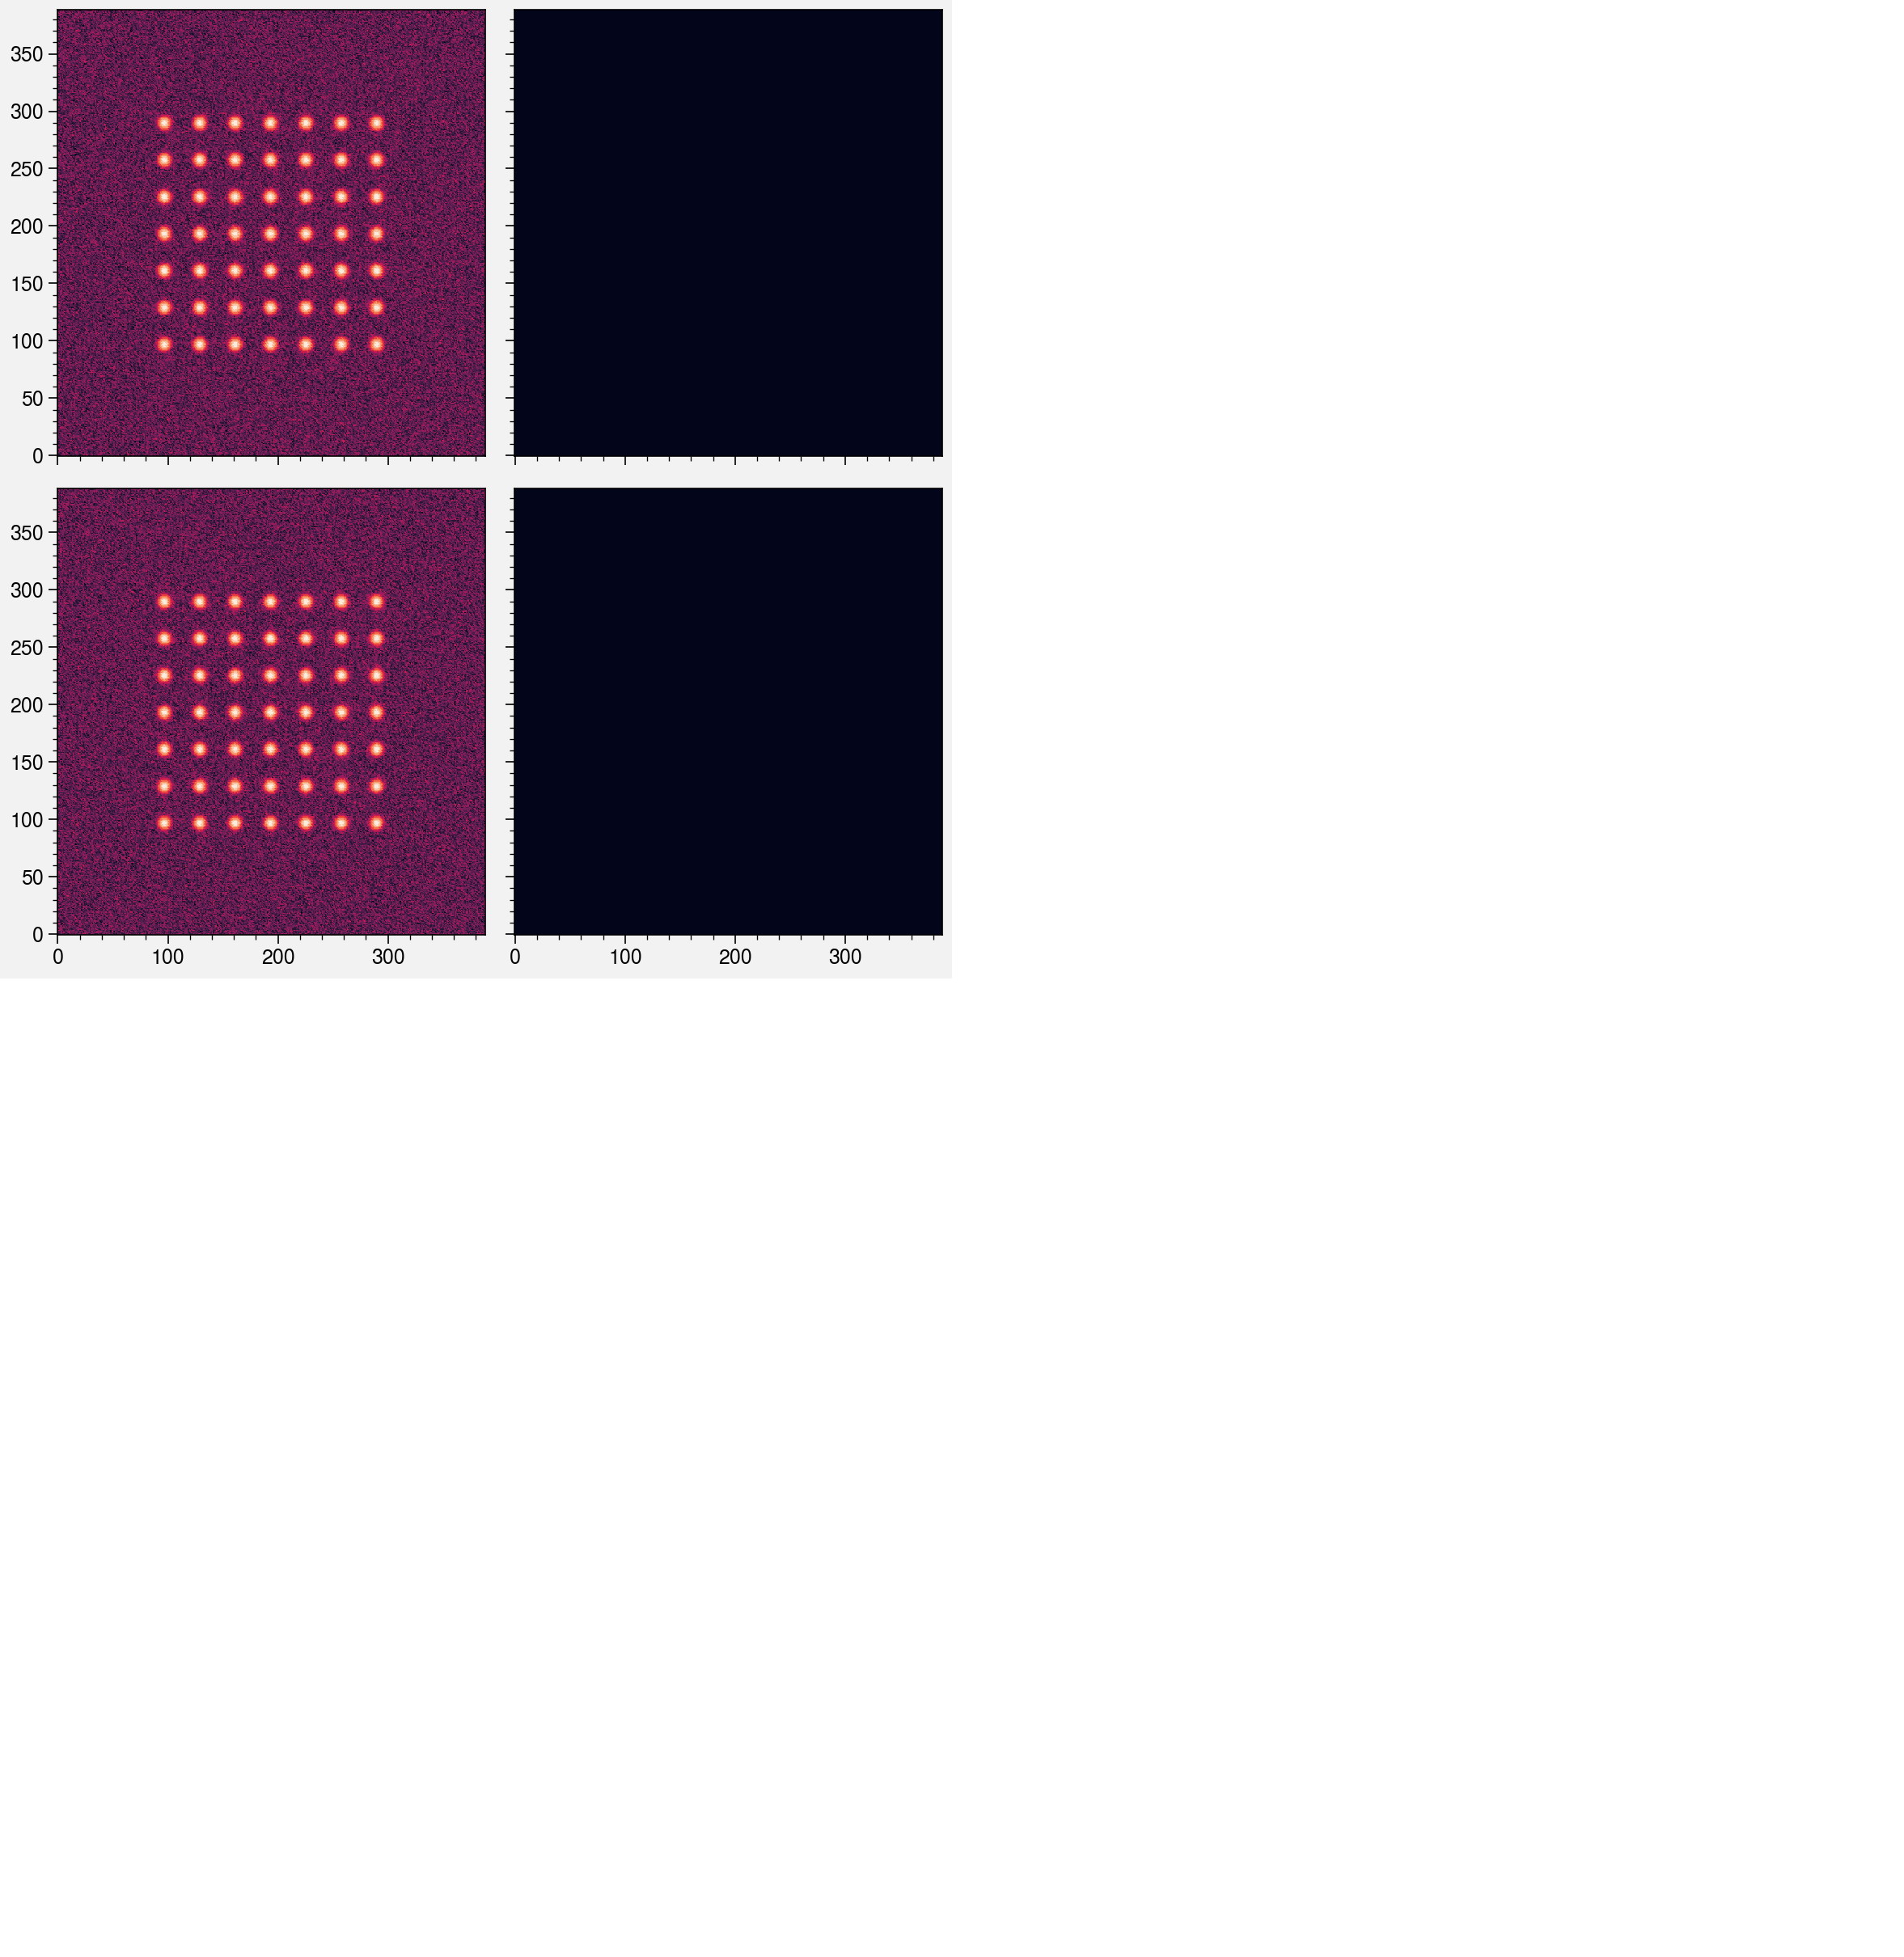

In [108]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket")


In [56]:
data["info"]

{'src_info': [{'scale': 1.0,
   'position_offset': 0,
   'affine_wcs_config': {'dudx': 0.22751466289766922,
    'dudy': -0.13193209680195317,
    'dvdx': 0.13193209680195317,
    'dvdy': 0.22751466289766922,
    'x0': 193.8895915745635,
    'y0': 193.95764456037912},
   'image_shape': [389, 389],
   'image_flags': 0,
   'galsim_psf_config': {'type': 'Gaussian',
    'fwhm': 0.8801068004857906,
    'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}},
  {'scale': 1.0,
   'position_offset': 0,
   'affine_wcs_config': {'dudx': 0.14927332162235257,
    'dudy': 0.21653285074516912,
    'dvdx': -0.21653285074516912,
    'dvdy': 0.14927332162235257,
    'x0': 193.89236218341955,
    'y0': 194.04696505043847},
   'image_shape': [389, 389],
   'image_flags': 0,
   'galsim_psf_config': {'type': 'Gaussian',
    'fwhm': 0.9556043396164032,
    'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}}],
 'affine_wcs_config': {'dudx': 0.263,
  'dudy': 0,
  'dvdx': 0,
  'dvdy': 0.263,
  'x0': 137,
  'y0': 137},


In [81]:
list(data.keys())

['info', 'img', 'wgt', 'msk', 'bkg']